In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
print(sys.version)
sys.path.append('../')

from models.powertrain.bounded_powertrain import Bounded_powertrain
from models.kinematic.ideal_diff_drive import Ideal_diff_drive
from models.kinematic.ICR_based import *
from models.kinematic.Perturbed_unicycle import *
from models.kinematic.enhanced_kinematic import *

3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]


In [81]:
#import training dataset

dataset = pd.read_pickle('/home/dominic/repos/norlab_WMRD/data/marmotte/grand_salon_12_12_a/torch_dataset_all.pkl')

print(dataset)

     init_icp_x  init_icp_y  init_icp_z  init_icp_roll  init_icp_pitch  \
0      0.000000    0.000000    0.000000       0.000000        0.000000   
1      0.000921    0.001698    0.000673       0.000344        0.008378   
2      0.002518    0.002642    0.000315      -0.000111        0.009173   
3     -0.003530    0.008637   -0.000532       0.000139        0.008575   
4     -0.002363    0.002334   -0.000460      -0.000212        0.008567   
..          ...         ...         ...            ...             ...   
886   -2.277788    1.319567   -0.006760       0.020737        0.010034   
887   -2.112234    0.742279   -0.001907       0.019724        0.012799   
888   -1.933754    0.131296    0.007527       0.024937        0.010533   
889   -1.839247   -0.199064   -0.003292       0.019568       -0.004226   
890   -1.875623   -0.232927   -0.001289       0.008867       -0.000580   

     init_icp_yaw  calib_step  cmd_left_0  cmd_right_0  cmd_left_1  ...  \
0        0.000000         0.0       

In [82]:
# fetch model params

icr_symmetric_params = np.load('../eval/training_results/marmotte/icr_symmetrical/grand_salon_a/train_full_all_horizons.npy')
icr_asymmetric_params = np.load('../eval/training_results/marmotte/icr_asymmetrical/grand_salon_a/train_full_all_horizons.npy')

print(icr_symmetric_params)
print(icr_asymmetric_params)

icr_symmetric_individual_params = np.load('../eval/training_results/marmotte/icr_symmetrical/grand_salon_a/train_individual_horizons.npy')

print(np.isnan(icr_symmetric_individual_params))

[0.88132674 0.25476058]
[ 0.86301886  0.9109506   0.00417836  0.22434593 -0.28777154]
[[ True  True]
 [ True  True]
 [ True  True]
 ...
 [ True  True]
 [ True  True]
 [ True  True]]


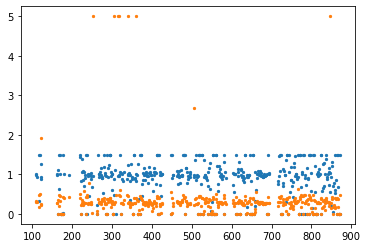

In [83]:
time_vec = np.linspace(0, icr_symmetric_individual_params.shape[0], icr_symmetric_individual_params.shape[0])
plt.scatter(time_vec, icr_symmetric_individual_params[:, 0], s=5)
plt.scatter(time_vec, icr_symmetric_individual_params[:, 1], s=5, c='C1')

(array([70.,  1.,  1.,  0.,  0.,  2.,  2.,  1.,  1.,  1.,  1.,  3.,  2.,
         0.,  2.,  3.,  0.,  2.,  4.,  6.,  3.,  1.,  2.,  7.,  6.,  6.,
         3.,  7., 10., 13., 16., 34., 38., 45., 17., 22.,  9.,  5.,  9.,
         5.,  4.,  4.,  5.,  3.,  0.,  3.,  2.,  0.,  3., 70.]),
 array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ,
        0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6 , 0.63,
        0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.9 , 0.93, 0.96,
        0.99, 1.02, 1.05, 1.08, 1.11, 1.14, 1.17, 1.2 , 1.23, 1.26, 1.29,
        1.32, 1.35, 1.38, 1.41, 1.44, 1.47, 1.5 ]),
 <BarContainer object of 50 artists>)

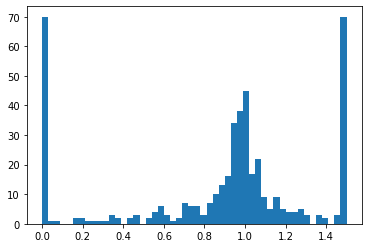

In [84]:
plt.hist(icr_symmetric_individual_params[:, 0], 50)

(array([ 80.,  29., 170., 102.,  57.,   4.,   2.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   7.]),
 array([2.80149375e-06, 1.00002745e-01, 2.00002689e-01, 3.00002633e-01,
        4.00002577e-01, 5.00002521e-01, 6.00002465e-01, 7.00002409e-01,
        8.00002353e-01, 9.00002297e-01, 1.00000224e+00, 1.10000219e+00,
        1.20000213e+00, 1.30000207e+00, 1.40000202e+00, 1.50000196e+00,
        1.60000191e+00, 1.70000185e+00, 1.80000179e+00, 1.90000174e+00,
        2.00000168e+00, 2.10000162e+00, 2.20000157e+00, 2.30000151e+00,
        2.40000146e+00, 2.50000140e+00, 2.60000134e+00, 2.70000129e+00,
        2.80000123e+00, 2.90000118e+00, 3.00000112e+00, 3.10000106e+00,
        3.20000101e+00, 3.30000095e+00, 3.40000090e+00, 3.50000084e+00,
        3.

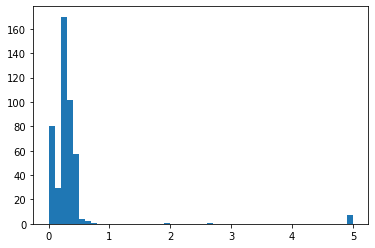

In [85]:
plt.hist(icr_symmetric_individual_params[:, 1], 50)

In [95]:
print(icr_symmetric_individual_params.shape)
steady_state_indexes = np.isnan(icr_symmetric_individual_params[:, 0]) == False
icr_symmetric_individual_params_steady_state = icr_symmetric_individual_params[steady_state_indexes]
icr_symmetric_individual_params_steady_state[:, 0] = np.clip(icr_symmetric_individual_params_steady_state[:, 0], 0.0, 1.0)
icr_symmetric_individual_params_steady_state[:, 1] = np.clip(icr_symmetric_individual_params_steady_state[:, 1], -1.0, 1.0)

print(icr_symmetric_individual_params_steady_state.shape)

cmd_left_steady_state = dataset['cmd_left_0'].to_numpy()
cmd_left_steady_state = cmd_left_steady_state[np.isnan(steady_state_indexes, where=False)]
print(cmd_left_steady_state.shape)
# cmd_left_steady_state = cmd_left_steady_state[]
cmd_right_steady_state = dataset['cmd_right_0'].to_numpy()
cmd_right_steady_state = cmd_right_steady_state[np.isnan(steady_state_indexes, where=False)]

# print(icr_symmetric_individual_params_steady_state)
print(np.min(icr_symmetric_individual_params_steady_state))
print(np.max(icr_symmetric_individual_params_steady_state))

(891, 2)
(454, 2)
(454,)
0.0
1.0


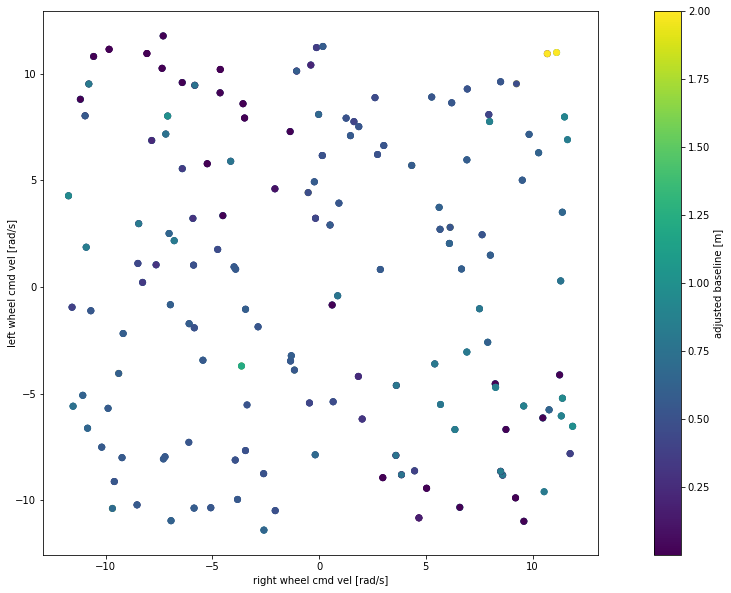

In [100]:
plt.figure(figsize=(20,10))
ax = plt.gca()
fig = plt.gcf()

scatter = plt.scatter(cmd_left_steady_state, cmd_right_steady_state, c=icr_symmetric_individual_params_steady_state[:, 1]*2)

ax.set_aspect('equal', 'box')

ax.set_ylabel('left wheel cmd vel [rad/s]', labelpad=-2)
ax.set_xlabel('right wheel cmd vel [rad/s]')

plt.colorbar(scatter, label='adjusted baseline [m]')